In [10]:
# Imports and Load Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load default dataset
df = pd.read_csv("StudentsPerformance_3_.csv")
print("Dataset loaded successfully!")
display(df.head())


Dataset loaded successfully!


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Preprocess Data and Define Target Columns

def preprocess_data(df):
    df = df.copy()
    le = LabelEncoder()
    for col in df.select_dtypes(include="object").columns:
        df[col] = le.fit_transform(df[col])
    return df

df_processed = preprocess_data(df)

# Restrict target columns to math/reading/writing scores
possible_targets = ["math score", "reading score", "writing score"]
target_cols = [col for col in df_processed.columns if col.lower() in [t.lower() for t in possible_targets]]

if not target_cols:
    raise ValueError("No valid score columns (math/reading/writing) found in this dataset.")

X = df_processed.drop(columns=target_cols)
y = df_processed[target_cols]


In [12]:
# Train/Test Split, Model Training and Evaluation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 232.92
R² Score: 0.02


In [14]:
# User Input for Prediction

print("\nEnter student details for prediction:")

input_data = {}
for col in df.columns:
    if col not in target_cols:
        if df[col].dtype == "object":
            options = df[col].unique()
            print(f"{col} options: {options}")
            val = input(f"Enter {col}: ")
            input_data[col] = val
        else:
            val = float(input(f"Enter {col} (numeric): "))
            input_data[col] = val

# Convert input into DataFrame
input_df = pd.DataFrame([input_data])
input_processed = preprocess_data(input_df)

# Align columns with training data
input_processed = input_processed.reindex(columns=X.columns, fill_value=0)

# Predict
prediction = model.predict(input_processed)
print("\nPredicted Scores:")
for i, col in enumerate(target_cols):
    print(f"{col}: {prediction[0][i]:.1f}")



Enter student details for prediction:
gender options: ['female' 'male']


Enter gender:  male


race/ethnicity options: ['group B' 'group C' 'group A' 'group D' 'group E']


Enter race/ethnicity:  group B


parental level of education options: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Enter parental level of education:  some college


lunch options: ['standard' 'free/reduced']


Enter lunch:  standard


test preparation course options: ['none' 'completed']


Enter test preparation course:  none



Predicted Scores:
math score: 70.5
reading score: 82.9
writing score: 81.0



Generating visualizations...


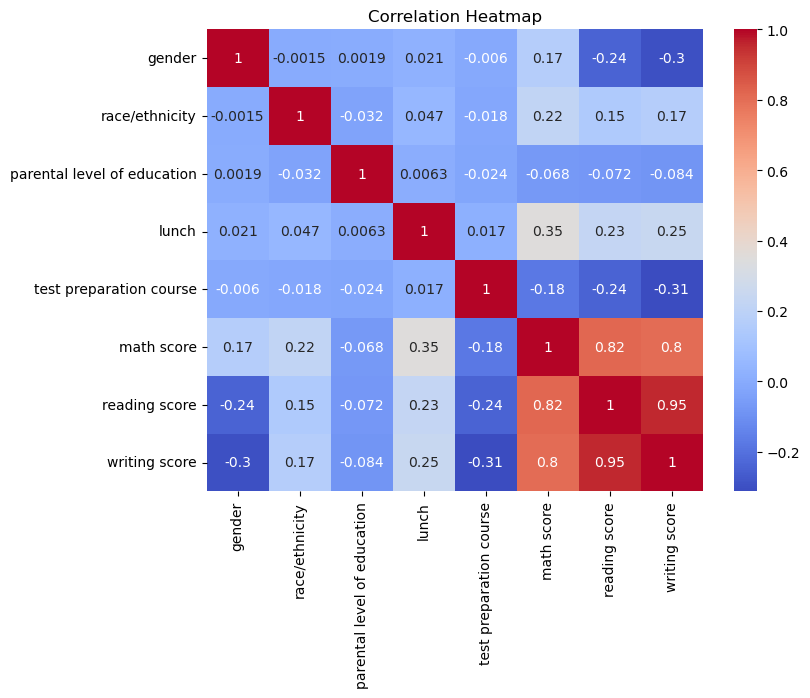

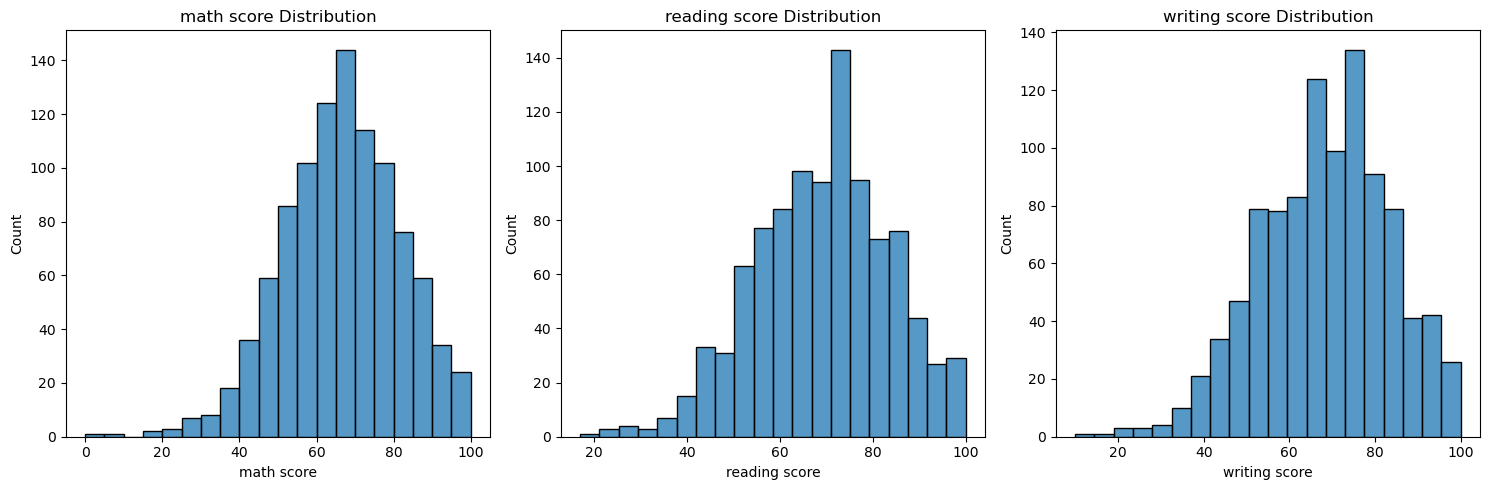

In [15]:
# Visualizations

print("\nGenerating visualizations...")

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_processed.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Score Distributions
fig, ax = plt.subplots(1, len(target_cols), figsize=(5*len(target_cols), 5))
if len(target_cols) == 1:
    ax = [ax]  # ensure iterable

for i, col in enumerate(target_cols):
    sns.histplot(df[col], bins=20, ax=ax[i])
    ax[i].set_title(f"{col} Distribution")

plt.tight_layout()
plt.show()
